# Displacements due to pressure variations in reservoir simulating a Disk-shaped reservoir under uniform depletion by using 1) a set of Geertsma's nucleus of strain  model  2) Geertsma's cylinder and 3) Our method with a set of prisms

This code aims at creating the synthetic simulating a Disk-shaped reservoir under uniform depletion and calculating the displacements due to pressure variations in this reservoir by using 
1) a set of Geertsma's nucleus of strain model 
2) Geertsma's cylinder and 
3) Our methodology that adopts the closed expressions of the full integrations of Nagy et al. (2000) and Nagy et al. (2002) considered a set of prisms


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import pickle

In [2]:
import compaction as cp
import geertsma_nucleus_strain as ns
import geertsma_disk as disk

In [3]:
# Parameters describing the cylindrical reservoir

R = 500. #radius of the cylinder 
top = 750. #reservoir top
bottom = 751 #reservoir bottom
h = bottom - top #reservoir thickness
# vertical coordinate of the cylinder center
D = 0.5*(bottom+top)
#  horizontal coordinates of the cylinder center
x0 = 0   
y0 = 0

In [4]:
print('reservoir thickness:', h )
print('reservoir Radius:', R )
print('depth-to-the-top of the reservoir:', top )
print('depth-to-the-bottom of the reservoir:', bottom )
print('coordinates of the center of the reservoir', y0, x0, D)

reservoir thickness: 1.0
reservoir Radius: 500.0
depth-to-the-top of the reservoir: 750.0
depth-to-the-bottom of the reservoir: 751
coordinates of the center of the reservoir 0 0 750.5


In [5]:
# Define the model which consists of a set of Np x Np prisms composing a disk-shaped reservoir 
# This model will be used by our methodology that used the closed expressions of the 
# full integrations of Nagy et al. (2000) and Nagy et al. (2002).

Np = 50  # number of prisms used to set up the disk-shaped reservoir 

model = cp.prism_layer_circular((y0,x0), R, (Np,Np), bottom, top)

In [6]:
# Calculating the volume of each prism
y_min = y0 - R
y_max = y0 + R
x_min = x0 - R
x_max = x0 + R
dy = (y_max - y_min)/Np
dx = (x_max - x_min)/Np

In [7]:
volume_prism = dx*dy*h
print('Volume of each prism:', volume_prism  )

Volume of each prism: 400.0


In [8]:
# Geertsma’s nucleus of strain model  Equation 12.39 page 404 of the Book 
# Fjaer, E., et al., 2008. Petroleum Related Rock Mechanics, 2nd ed. Elsevier.

Ns = 50  # number of nucleus of strain used to set up the disk-shaped reservoir 

model_ns  = ns.nuclei_layer_circular((y0,x0), R, (Ns,Ns), D)

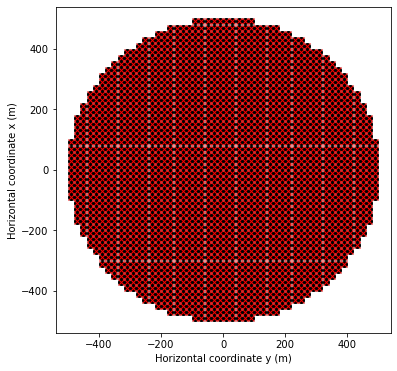

In [9]:
# Plot the horizontal coordinates of the Np prisms (in black dots) and 
# Plot the horizontal coordinates of the Ns nucleus of strain (in red crosses)

plt.figure(figsize=(6,6))
plt.plot(0.5*(model[:,0]+model[:,1]), 
         0.5*(model[:,2]+model[:,3]), 'ko')
plt.plot(model_ns[:,0], model_ns[:,1], 'rx')
plt.ylabel("Horizontal coordinate x (m)")
plt.xlabel("Horizontal coordinate y (m)")
plt.show()

In [10]:
# Define the model which consists of a disk-shaped reservoir (one cylinder)
# This model will be used Geertsma's (1973) method 
# Reference: Geertsma, J.: Land Subsidence above compacting oil and gas reservoirs, 
# J. Pet. Tech. 25, 734-744, 1973.
model_ge  = [y0, x0, D, R, h]

In [11]:
# Pressure variation (in MPa)
DP    = np.zeros(len(model)) - 10.  # Pressure variation of our methodology that uses prisms
DP_ns = -10.*volume_prism           # Pressure variation of Geertsma nucleus of strain
DP_ge = -10.                        # Pressure variation of Geertsma disk-shaped model

#### Young’s modulus $E$ and  Poisson's ratio $\nu$ 

In [12]:
# Young’s modulus (in MPa)
young = 3300

# Poisson coefficient
poisson = 0.25

### The uniaxial compaction coefficient $C_m$ 
$C_m = \frac{1}{E} \: \frac{(1 + \nu) (1  - 2\nu)}{(1-\nu)}$

In [13]:
cm = cp.Cm(poisson, young) # uniaxial compaction coefficient in 1/MPa
G = disk.G(poisson, young)
print ('CM', cm, 'G', G)

CM 0.0002525252525252525 G 1320.0


### Coordinates on the plane x = 0 m

In [14]:
# Define computation points on cross-sections at x  = 0
shape = (120, 24)
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])
y, z = np.meshgrid(y, z)
y = y.ravel()
z = z.ravel()
x = np.zeros_like(y)
coordinates = np.vstack([y, x, z])

### Our methodology with the closed expressions of the full integrations of Nagy et al. (2000) and Nagy et al. (2002): Compute the displacement components on plane x = 0 m 

In [15]:
# Compute the x-component of displacement
displacement_x = cp.displacement_x_component(coordinates, model, DP, poisson, young)

# Compute the y-component of displacement
displacement_y = cp.displacement_y_component(coordinates, model, DP, poisson, young)

# Compute the z-component of displacement
displacement_z = cp.displacement_z_component(coordinates, model, DP, poisson, young)

In [16]:
# horizontal component of displacement equation (39)
displacement_horizontal = np.sqrt(displacement_x**2 + displacement_y**2)

### Geertsma’s nucleus of strain model:  Compute the displacement  components on plane x = 0 m

In [17]:
# Compute the x-component of displacement
displacement_x_ns = ns.displacement_x_component(coordinates, model_ns, DP_ns, poisson, young)

# Compute the y-component of displacement
displacement_y_ns = ns.displacement_y_component(coordinates, model_ns, DP_ns, poisson, young)

# Compute the z-component of displacement
displacement_z_ns = ns.displacement_z_component(coordinates, model_ns, DP_ns, poisson, young)

In [18]:
# horizontal component of displacement 
displacement_horizontal_ns = np.sqrt(displacement_x_ns**2 + displacement_y_ns**2)

### Geertsma’s disk-shaped reservoir (one cylinder):  Compute the displacement  components on plane x = 0 m

In [19]:
# ur is the horizontal displacement and uz is the vertical displacement calculated by Geertsma's (1973) method 

ur, uz = disk.Geertsma_disk_displacement(coordinates, model_ge, DP_ge, poisson, young)

## PLOT DISPLACEMENT FIELD BY OUR METHODOLOGY: 

### Plot the results of the displacement fields on plane x = 0 m

In [20]:
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])

## Plot the displacement fields by using our methodology

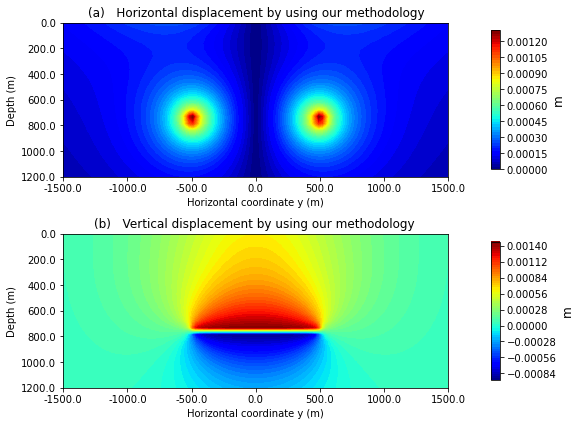

In [21]:
# Plot the displacement fields 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, displacement_horizontal.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Horizontal displacement by using our methodology")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, displacement_z.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   Vertical displacement by using our methodology ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)


# Plot the displacement fields by using Geertsma's (1973) nucleus of strain

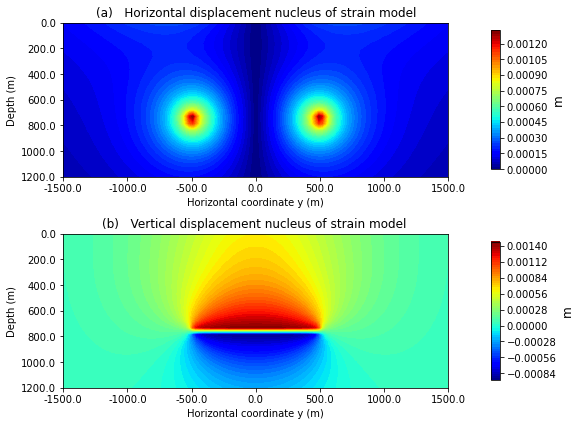

In [22]:
# Plot the displacement fields by using Geertsma's (1973) nucleus of strain
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, displacement_horizontal_ns.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Horizontal displacement nucleus of strain model")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, displacement_z_ns.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   Vertical displacement nucleus of strain model ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)


# Plot the displacement fields by using Geertsma's (1973) cylinder

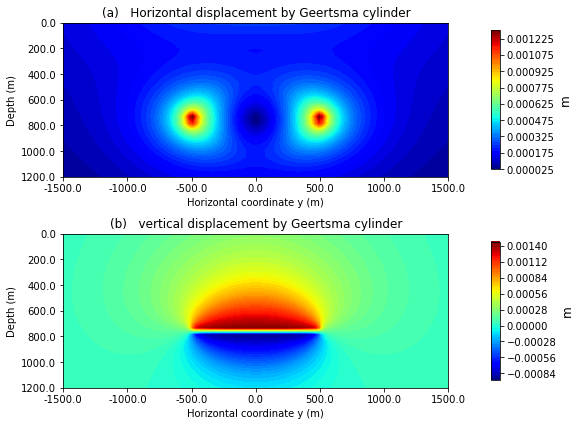

In [23]:
# Plot the displacement fields by Geertsma
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, ur.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Horizontal displacement by Geertsma cylinder")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, uz.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   vertical displacement by Geertsma cylinder")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)


### Differences

In [24]:
#Difference Vertical Displacements Geertsma nucleus of strain and cylinder 
diff_ge = displacement_z_ns - uz

#Difference Vertical Displacement Nagy and Geertsma nucleus 
diff_nagy_ns = displacement_z - displacement_z_ns 

#Difference Vertical Displacement Nagy and cylinder 
diff_nagy_ge = displacement_z - uz

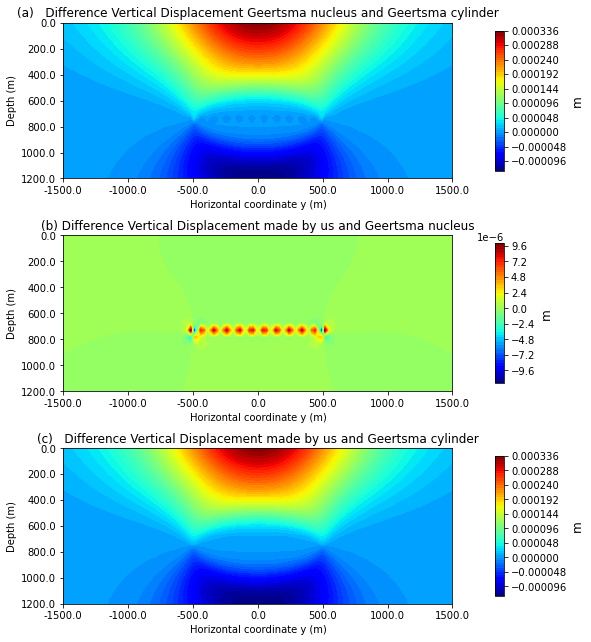

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=False, figsize=(12,9))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, diff_ge.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Difference Vertical Displacement Geertsma nucleus and Geertsma cylinder")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, diff_nagy_ns.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b) Difference Vertical Displacement made by us and Geertsma nucleus")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")

ax[2].set_aspect("equal")
img = ax[2].contourf(y, z, diff_nagy_ge.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[2], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[2].set_title("(c)   Difference Vertical Displacement made by us and Geertsma cylinder")

ax[2].set_xticklabels(ax[2].get_xticks())
ax[2].set_yticklabels(ax[2].get_yticks())
ax[2].invert_yaxis()
ax[2].set_xlabel("Horizontal coordinate y (m)")
ax[2].set_ylabel("Depth (m)")

plt.tight_layout(True)
